In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import tensorflow as ts
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Bidirectional


In [2]:
df = pd.read_csv('Clean_data.csv',index_col=0)
df.head()

,clean_text,Label
0,oily creamy expected ordered try highlight con...,0
1,palette decent price looking different shades ...,0
2,texture concealer pallet fantastic great cover...,0
3,really tell exactly thing powder kind oil ish ...,0
4,little smaller expected okay lasted long time ...,0


In [3]:
df['clean_text'] = df['clean_text'].apply(lambda x : str(x))

In [4]:
x = df['clean_text']
y = df['Label']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

# Tokenization

In [6]:
tok = Tokenizer(oov_token= '<unk>')

In [7]:
#We fit only on training data and transform on testing data

In [8]:
#fitting on training data
tok.fit_on_texts(x_train)

In [9]:
len(tok.word_index)

99369

In [10]:
train_sequences = tok.texts_to_sequences(x_train)
test_sequences = tok.texts_to_sequences(x_test)

In [11]:
with open('filename.pickle','wb')as handle:
    pickle.dump(tok,handle,protocol=pickle.HIGHEST_PROTOCOL)

## Padding

(array([77860., 78817., 41276., 23841., 14107.,  8816.,  5736.,  3758.,
         2619.,  1945.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

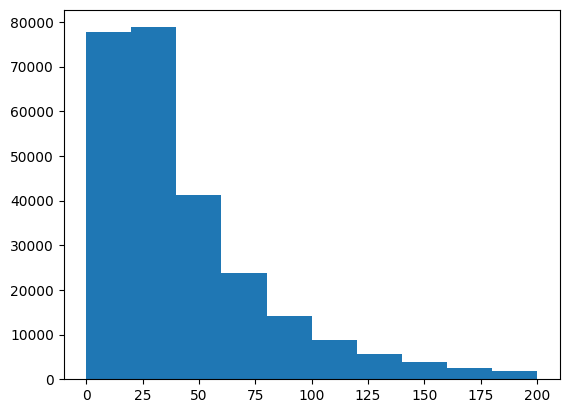

In [12]:
plt.hist(df['clean_text'].apply(lambda x : len(x.split())),range = (0,200))

In [13]:
x_train = pad_sequences(train_sequences,maxlen=100,padding='pre',truncating='pre')
x_test = pad_sequences(test_sequences,maxlen=100,padding='pre',truncating='pre')

# Model building

In [14]:
model = Sequential([
    Embedding(99370,300),
    Bidirectional(LSTM(128)),
    Dense(100,activation='relu'),
    Dense(6,activation='softmax')    
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         29811000  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              439296    
 l)                                                              
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 30,276,602
Trainable params: 30,276,602
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,batch_size=500,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
424/424 [==============================] - 1509s 4s/step - loss: 0.3179 - accuracy: 0.8852 - val_loss: 0.1742 - val_accuracy: 0.9443
Epoch 2/10
424/424 [==============================] - 1484s 4s/step - loss: 0.1135 - accuracy: 0.9639 - val_loss: 0.1529 - val_accuracy: 0.9514
Epoch 3/10
424/424 [==============================] - 1494s 4s/step - loss: 0.0834 - accuracy: 0.9733 - val_loss: 0.1625 - val_accuracy: 0.9488
Epoch 4/10
424/424 [==============================] - 1492s 4s/step - loss: 0.0677 - accuracy: 0.9780 - val_loss: 0.1805 - val_accuracy: 0.9465
Epoch 5/10
424/424 [==============================] - 1492s 4s/step - loss: 0.0556 - accuracy: 0.9817 - val_loss: 0.1951 - val_accuracy: 0.9460
Epoch 6/10
424/424 [==============================] - 1493s 4s/step - loss: 0.0490 - accuracy: 0.9837 - val_loss: 0.1983 - val_accuracy: 0.9456
Epoch 7/10
424/424 [==============================] - 1488s 4s/step - loss: 0.0397 - accuracy: 0.9871 - val_loss: 0.2242 - val_accuracy:

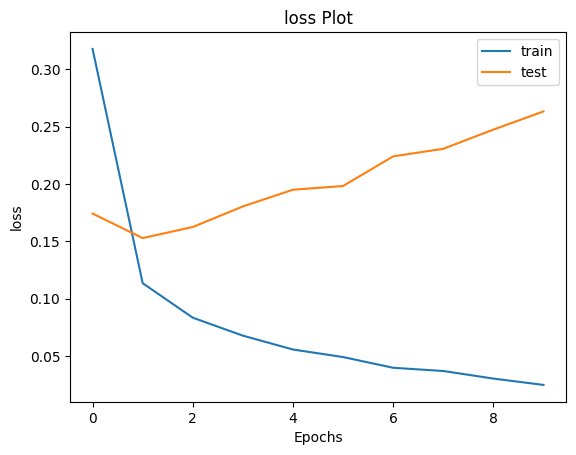

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('loss Plot')
plt.legend(['train','test'])

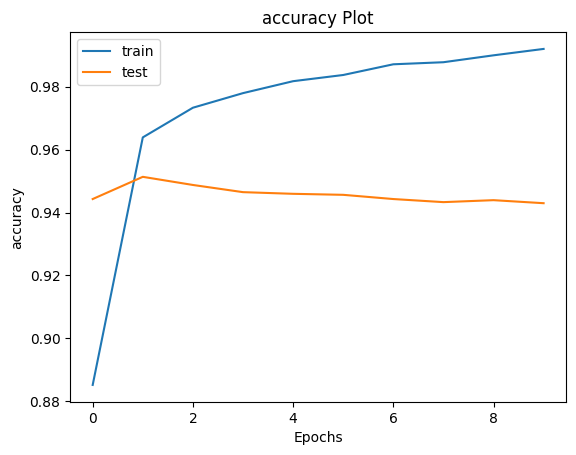

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('accuracy Plot')
plt.legend(['train','test'])